In [1]:
!unzip /content/Covid.zip


Archive:  /content/Covid.zip
   creating: Covid/
  inflating: __MACOSX/._Covid        
  inflating: Covid/aa036185e3.csv    
  inflating: __MACOSX/Covid/._aa036185e3.csv  
  inflating: Covid/5108b04245.csv    
  inflating: __MACOSX/Covid/._5108b04245.csv  
  inflating: Covid/b9b65b7a69.csv    
  inflating: __MACOSX/Covid/._b9b65b7a69.csv  
  inflating: Covid/78cc008261.csv    
  inflating: __MACOSX/Covid/._78cc008261.csv  
  inflating: Covid/f9edcb7056.csv    
  inflating: __MACOSX/Covid/._f9edcb7056.csv  
  inflating: Covid/a1c2e6b2eb.csv    
  inflating: __MACOSX/Covid/._a1c2e6b2eb.csv  
  inflating: Covid/b325aa1406.csv    
  inflating: __MACOSX/Covid/._b325aa1406.csv  
  inflating: Covid/71980b2daf.csv    
  inflating: __MACOSX/Covid/._71980b2daf.csv  
  inflating: Covid/1942df1c47.csv    
  inflating: __MACOSX/Covid/._1942df1c47.csv  
  inflating: Covid/403155ae59.csv    
  inflating: __MACOSX/Covid/._403155ae59.csv  
  inflating: Covid/856d41cc60.csv    
  inflating: __MACOSX/Cov

In [2]:
!unzip /content/Non_Covid.zip

Archive:  /content/Non_Covid.zip
   creating: Non_Covid/
  inflating: __MACOSX/._Non_Covid    
  inflating: Non_Covid/a1c2e6b2eb6.csv  
  inflating: __MACOSX/Non_Covid/._a1c2e6b2eb6.csv  
  inflating: Non_Covid/a1c2e6b2eb7.csv  
  inflating: __MACOSX/Non_Covid/._a1c2e6b2eb7.csv  
  inflating: Non_Covid/a1c2e6b2eb5.csv  
  inflating: __MACOSX/Non_Covid/._a1c2e6b2eb5.csv  
  inflating: Non_Covid/a1c2e6b2eb4.csv  
  inflating: __MACOSX/Non_Covid/._a1c2e6b2eb4.csv  
  inflating: Non_Covid/a1c2e6b2eb0.csv  
  inflating: __MACOSX/Non_Covid/._a1c2e6b2eb0.csv  
  inflating: Non_Covid/295ed9627910.csv  
  inflating: __MACOSX/Non_Covid/._295ed9627910.csv  
  inflating: Non_Covid/295ed9627911.csv  
  inflating: __MACOSX/Non_Covid/._295ed9627911.csv  
  inflating: Non_Covid/a1c2e6b2eb1.csv  
  inflating: __MACOSX/Non_Covid/._a1c2e6b2eb1.csv  
  inflating: Non_Covid/a1c2e6b2eb3.csv  
  inflating: __MACOSX/Non_Covid/._a1c2e6b2eb3.csv  
  inflating: Non_Covid/295ed9627913.csv  
  inflating: __MACOSX/

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from numpy import where
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


In [ ]:
!pip install lime
import lime
import lime.lime_tabular

Read the contents of each csv file and store the required features in an array.
0 is the label for Covid-19 data and 1 for Non-covid 19 data.

In [3]:

columns=['bpm','meanrr','mxdmn','sdnn','rmssd','pnn50','mode','amo','lf','hf','vlf','lfhf','total_power']
# columns=['meanrr','mxdmn','sdnn','rmssd','pnn50','mode','amo','lf','hf','vlf','lfhf']
def load_files(folder,label,loaded=[],labels=[]):
  
  for file in os.listdir(folder):
    if(file[-3:]=='csv'):
      filepath=folder+'/'+file
      data=pd.read_csv(filepath)
      # loaded.append(filepath)
      df=data[columns]
      vals=df.values
      loaded.append(vals)
      labels.append(label)
  

  return loaded,labels

In [4]:
loaded1,labels1=load_files('/content/Covid',0,loaded=[],labels=[])
loaded2,labels2=load_files('/content/Non_Covid',1,loaded1,labels1)


In [5]:
print(len(loaded2))
print(len(labels2))


99
99


Store them as numpy arrays for easier computation 

In [6]:
dataset=np.array(loaded2)
datalabels=np.array(labels2)

Make sure that all the observations have 15 time steps and 13 features

In [7]:
for ele in dataset:
  if(len(ele)!=15):
    print(len(ele))
  for ele1 in ele:
    if(len(ele1)!=13):
      print(len(ele1))
  

Visualise the features at column indices 10 and 12

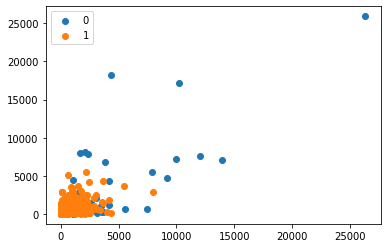

In [31]:
counter1 = Counter(datalabels)
for label, _ in counter1.items():
  row_ix = where(datalabels == label)[0]
  pyplot.scatter(dataset[row_ix, 10], dataset[row_ix, 12], label=str(label))
  
  
pyplot.legend()
pyplot.show()

Since 0 is a minority class, we oversample this class using SMOTE. 

In [10]:
orig_shape = dataset.shape
print(dataset.shape)
arr1 = dataset.ravel()
print(arr1.shape)
## convert to 2D array for smote
arr=arr1.reshape(99,-1)
oversample = SMOTE(random_state=2)
x, y = oversample.fit_resample(arr, datalabels)
##get back the original 3D shape
X = np.reshape(x, (-1,15,13))

(99, 15, 13)
(19305,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Visualise features at column index 10 and 12 again and we see minority class 0 has been oversampled with 71 samples in each class.

Counter({0: 71, 1: 71})


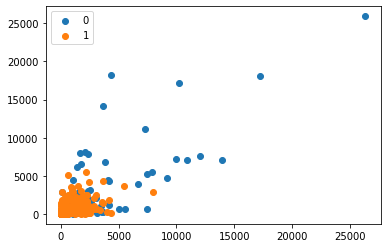

In [32]:
counter = Counter(y)
print(counter)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 10], X[row_ix, 12], label=str(label))
pyplot.legend()
pyplot.show()

Normalise the values in the dataset using Standard Scaler

In [33]:
scaler = StandardScaler()
scaler = scaler.fit(x)
normalized = scaler.transform(x)
X1 = np.reshape(normalized, (-1,15,13))
X1.shape

(142, 15, 13)

In [34]:
normalized.shape

(142, 195)

Shuffle the dataset as all samples from one class are arranged together

In [35]:
X2, y2 = shuffle(X1, y,random_state=2)

Initialise the variables for the LSTM network

In [37]:
n_timesteps=15
n_features=13
n_outputs=1


Using Stratified KFold validation technique with 5 folds,and in each iteration 1 fold behaves as the testing set while the other 4 folds behave as the training set.

The LSTM hidden layer outputs 380 units. It is followed by a dense layer with 380 units output to gather the results from the LSTM layer. Finally, another dense layer produces a single output with the sigmoid actiavtion function. 

The network is trained over 160 epochs with a batch size of 12. A validation split of 0.15 is used. We use callbacks to stop training when validation loss is minimum. We also use model checkpoints to save the model with min validation loss. 
The best models in each iteration of cross fold are stored in the Saved models directory.
The training vs validation loss over 160 epochs is plotted.
The best model in that iteration is used on the testing set and accuracy and loss are appended to TEST ACCURACY and TEST LOSS arrays respectively.

Finally the session is cleared to reinitialise the the model for next iteration.

Train on 96 samples, validate on 17 samples
Epoch 1/160
96/96 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.4062 - val_loss: 0.7155 - val_accuracy: 0.2353

Epoch 00001: val_loss improved from inf to 0.71548, saving model to /content/sample_data/Saved models/bestmodel1.h5
Epoch 2/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.4375 - val_loss: 0.7112 - val_accuracy: 0.2353

Epoch 00002: val_loss improved from 0.71548 to 0.71123, saving model to /content/sample_data/Saved models/bestmodel1.h5
Epoch 3/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.4792 - val_loss: 0.7071 - val_accuracy: 0.2941

Epoch 00003: val_loss improved from 0.71123 to 0.70710, saving model to /content/sample_data/Saved models/bestmodel1.h5
Epoch 4/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5000 - val_loss: 0.7032 - val_accuracy: 0.2941

Epoch 00004: val_loss improved f

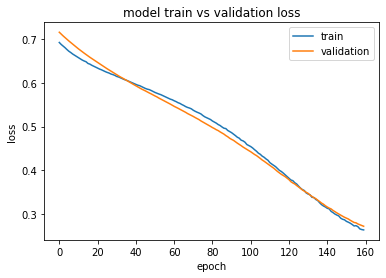

Train on 96 samples, validate on 17 samples
Epoch 1/160
96/96 [==============================] - 1s 6ms/step - loss: 0.6843 - accuracy: 0.6562 - val_loss: 0.6985 - val_accuracy: 0.6471

Epoch 00001: val_loss improved from inf to 0.69850, saving model to /content/sample_data/Saved models/bestmodel2.h5
Epoch 2/160
96/96 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.6979 - val_loss: 0.6990 - val_accuracy: 0.6471

Epoch 00002: val_loss did not improve from 0.69850
Epoch 3/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6979 - val_loss: 0.6994 - val_accuracy: 0.6471

Epoch 00003: val_loss did not improve from 0.69850
Epoch 4/160
96/96 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6979 - val_loss: 0.7001 - val_accuracy: 0.6471

Epoch 00004: val_loss did not improve from 0.69850
Epoch 5/160
96/96 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.6667 - val_loss: 0.7006 -

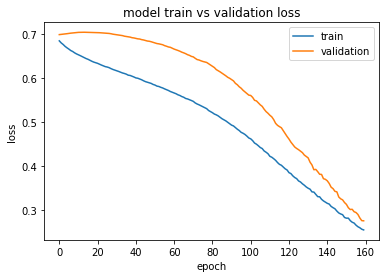

Train on 96 samples, validate on 18 samples
Epoch 1/160
96/96 [==============================] - 1s 6ms/step - loss: 0.6944 - accuracy: 0.5104 - val_loss: 0.6866 - val_accuracy: 0.6111

Epoch 00001: val_loss improved from inf to 0.68659, saving model to /content/sample_data/Saved models/bestmodel3.h5
Epoch 2/160
96/96 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5833 - val_loss: 0.6848 - val_accuracy: 0.6111

Epoch 00002: val_loss improved from 0.68659 to 0.68480, saving model to /content/sample_data/Saved models/bestmodel3.h5
Epoch 3/160
96/96 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6354 - val_loss: 0.6828 - val_accuracy: 0.6111

Epoch 00003: val_loss improved from 0.68480 to 0.68281, saving model to /content/sample_data/Saved models/bestmodel3.h5
Epoch 4/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.7188 - val_loss: 0.6807 - val_accuracy: 0.6111

Epoch 00004: val_loss improved f

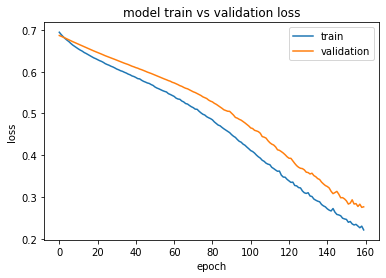

Train on 96 samples, validate on 18 samples
Epoch 1/160
96/96 [==============================] - 1s 6ms/step - loss: 0.6820 - accuracy: 0.7396 - val_loss: 0.6909 - val_accuracy: 0.5556

Epoch 00001: val_loss improved from inf to 0.69092, saving model to /content/sample_data/Saved models/bestmodel4.h5
Epoch 2/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.7188 - val_loss: 0.6905 - val_accuracy: 0.5556

Epoch 00002: val_loss improved from 0.69092 to 0.69051, saving model to /content/sample_data/Saved models/bestmodel4.h5
Epoch 3/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.7292 - val_loss: 0.6902 - val_accuracy: 0.5556

Epoch 00003: val_loss improved from 0.69051 to 0.69020, saving model to /content/sample_data/Saved models/bestmodel4.h5
Epoch 4/160
96/96 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.7396 - val_loss: 0.6896 - val_accuracy: 0.5556

Epoch 00004: val_loss improved f

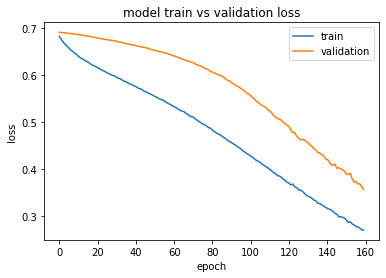

Train on 96 samples, validate on 18 samples
Epoch 1/160
96/96 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.3438 - val_loss: 0.6907 - val_accuracy: 0.4444

Epoch 00001: val_loss improved from inf to 0.69070, saving model to /content/sample_data/Saved models/bestmodel5.h5
Epoch 2/160
96/96 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.4271 - val_loss: 0.6882 - val_accuracy: 0.4444

Epoch 00002: val_loss improved from 0.69070 to 0.68815, saving model to /content/sample_data/Saved models/bestmodel5.h5
Epoch 3/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5208 - val_loss: 0.6858 - val_accuracy: 0.6667

Epoch 00003: val_loss improved from 0.68815 to 0.68576, saving model to /content/sample_data/Saved models/bestmodel5.h5
Epoch 4/160
96/96 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5833 - val_loss: 0.6836 - val_accuracy: 0.7222

Epoch 00004: val_loss improved f

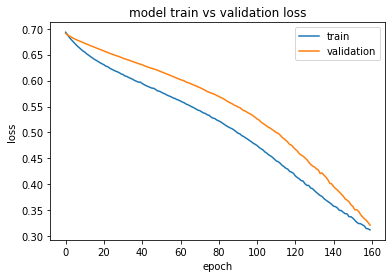

In [65]:

TEST_ACCURACY = []
TEST_LOSS = []
num_folds=5

kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2)
save_dir='/content/sample_data/Saved models/'
fold_no = 1
verbose, epochs, batch_size = 1, 160, 12
for train, test in kfold.split(X2, y2):
  # y_train = to_categorical(y2[train])
  # y_test = to_categorical(y2[test])
  y_train=y2[train]
  y_test=y2[test]

  model = Sequential()
  
  model.add(LSTM(380, input_shape=(n_timesteps,n_features)))
  # model.add(Dropout(0.1))
  
  model.add(Dense(380, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  opt = SGD(lr=0.01)
  # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=['accuracy'])

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=70)

  mc = ModelCheckpoint((save_dir+"bestmodel"+str(fold_no)+".h5"), 
							monitor='val_loss', verbose=1, 
							save_best_only=True, mode='min')
  # fit network

  history=model.fit(X2[train], y_train, epochs=epochs, batch_size=batch_size, verbose=verbose,validation_split=0.15, callbacks=[es,mc])
  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])
  pyplot.title('model train vs validation loss')
  pyplot.ylabel('loss')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'validation'], loc='upper right')
  pyplot.show()
  model.load_weights((save_dir+"bestmodel"+str(fold_no)+".h5"))
  
  results = model.evaluate(X2[test], y_test, verbose=0)
  # _, test_acc = saved_model.evaluate(test_X, y_test, verbose=0))
  results = dict(zip(model.metrics_names,results))

  TEST_ACCURACY.append(results['accuracy'])
  TEST_LOSS.append(results['loss'])
  tf.keras.backend.clear_session()
  fold_no+=1


In [66]:
TEST_ACCURACY

[0.9655172228813171,
 0.8620689511299133,
 0.8214285969734192,
 0.8571428656578064,
 0.8571428656578064]

In [67]:
TEST_LOSS

[0.2582414448261261,
 0.32357028126716614,
 0.3914768099784851,
 0.32760491967201233,
 0.34733766317367554]

The best model from all 5 folds of testing is loaded and a new train and test split is created, and the model is tested on the new test set.

In [68]:

saved_model = load_model('/content/sample_data/Saved models/bestmodel1.h5')

In [70]:
train_X, test_X, train_y, test_y = train_test_split(X1, y, test_size=0.5, random_state=42)
print(train_X.shape)
_, test_acc=saved_model.evaluate(test_X, test_y, verbose=0)

print('Test: %.3f' % (test_acc))

(71, 15, 13)
Test: 0.915


We store the predictions as 0 and 1 in an array called pred.

In [71]:
val=saved_model.predict(test_X)

print(val)
pred=[]
for ele in val:
  if(ele>0.5):
    pred.append(1)
  else:
    pred.append(0)

print(pred)


[[2.1303588e-01]
 [3.6423389e-02]
 [6.1584091e-01]
 [9.5915306e-01]
 [6.6649193e-01]
 [2.3665598e-01]
 [9.7966903e-01]
 [9.4969022e-01]
 [8.5480124e-01]
 [4.4209792e-04]
 [5.8634168e-01]
 [3.5127309e-01]
 [7.1620727e-01]
 [1.4794931e-04]
 [5.6528580e-01]
 [8.2412553e-01]
 [2.9040009e-01]
 [8.0131543e-01]
 [2.0436428e-01]
 [3.2492015e-01]
 [1.4481215e-01]
 [3.6641952e-01]
 [1.8992230e-01]
 [1.8509443e-01]
 [8.6771393e-01]
 [9.7789043e-01]
 [1.0697679e-01]
 [8.6599767e-02]
 [8.1518944e-03]
 [2.1637094e-01]
 [5.4803282e-01]
 [9.1684145e-01]
 [6.0401267e-01]
 [6.0785568e-01]
 [1.3658562e-01]
 [2.0370409e-01]
 [5.1000804e-01]
 [9.3974382e-01]
 [1.7651145e-01]
 [7.0349914e-01]
 [6.9399786e-01]
 [6.0470474e-01]
 [1.2652583e-04]
 [5.9650260e-01]
 [9.4906455e-01]
 [9.6049201e-01]
 [9.0338975e-01]
 [4.4769511e-02]
 [1.8332674e-01]
 [1.6609029e-01]
 [9.6765345e-01]
 [9.7472590e-01]
 [6.4926785e-01]
 [1.3561557e-01]
 [3.4660858e-01]
 [8.8826448e-01]
 [6.0170867e-02]
 [9.5997256e-01]
 [2.5479588e-0

A function is defined to convert the output of prediction to a set of probabilities for each class, such that they sum up to 1. This is used by the LIME RecurrentTabularExplainer to learn a linear model using these prediction probabilites for a chosen value and sampling some of its neighbours as training samples.

In [110]:
def prob(data):

  # print(data.shape)
  y_pred=saved_model.predict(data).reshape(-1, 1)
  y_pred =(y_pred>0.5)
  # print(np.array(list(zip(1-y_pred.reshape(data.shape[0]),y_pred.reshape(data.shape[0])))))
  return np.hstack((1-y_pred,y_pred))


LIME learns to pick the top few features by experimenting with different permutations to create a sparse linear model that approximates well in the neighbourhood.

In [74]:
explainer = lime.lime_tabular.RecurrentTabularExplainer(train_X, training_labels=train_y, feature_names=columns,discretize_continuous=True,discretizer='decile',
                                                   class_names=['Covid', 'Non-Covid'])




We can now see the model's explanation for the test data at index 11. We can see which features contribute to the wrong classification. Removing the features in blue would shift the probability of classification to Non-Covid.

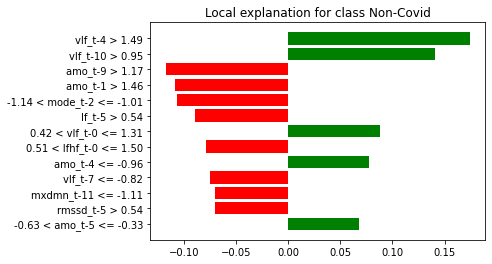

In [111]:
i=11 #change this
test_X1=test_X[i].reshape(13,-1)
exp = explainer.explain_instance(test_X1,prob, num_features=13)
# print(exp.as_list()) ## For list 
exp.show_in_notebook(show_all=False) ## For clear visualisation
# fig=exp.as_pyplot_figure() ## For a clear plot

This is to compare which predictions were right so we can use the indices to change i above.

In [75]:
for i in range(len(test_y)):
  print(i,pred[i],test_y[i])

0 0 0
1 0 0
2 1 1
3 1 1
4 1 1
5 0 0
6 1 1
7 1 1
8 1 1
9 0 0
10 1 1
11 0 1
12 1 1
13 0 0
14 1 0
15 1 1
16 0 0
17 1 1
18 0 0
19 0 1
20 0 0
21 0 0
22 0 0
23 0 0
24 1 1
25 1 1
26 0 0
27 0 0
28 0 0
29 0 0
30 1 1
31 1 1
32 1 1
33 1 0
34 0 0
35 0 0
36 1 0
37 1 1
38 0 0
39 1 1
40 1 1
41 1 1
42 0 0
43 1 1
44 1 1
45 1 1
46 1 1
47 0 0
48 0 0
49 0 0
50 1 1
51 1 1
52 1 1
53 0 0
54 0 1
55 1 1
56 0 0
57 1 1
58 0 0
59 0 0
60 1 1
61 1 1
62 0 0
63 1 1
64 0 0
65 1 1
66 1 1
67 0 0
68 1 1
69 0 0
70 0 0


In [ ]:
!zip -r SavedModels "/content/sample_data/Saved models"

  adding: content/sample_data/Saved models/ (stored 0%)
  adding: content/sample_data/Saved models/bestmodel3.h5 (deflated 8%)
  adding: content/sample_data/Saved models/bestmodel4.h5 (deflated 7%)
  adding: content/sample_data/Saved models/bestmodel1.h5 (deflated 7%)
  adding: content/sample_data/Saved models/bestmodel2.h5 (deflated 7%)
